# Turning Tuesdays

In financial markets, traders talk about the concept of "Turning Tuesday." The idea is that if a market is down for several days in a row, it will never turn around on a Friday because traders don't want to stay in a position over the weekend. Their pessism looms over the weekend. Likewise, on a Monday, traders have been sitting around depressed for the whole weekend (because the market is down) so Monday will stay down. It's on Tuesday that more rational heads prevail, so a down market will more likely "turn around" on a Tuesday.

### There is anectdotal evidence to support this....

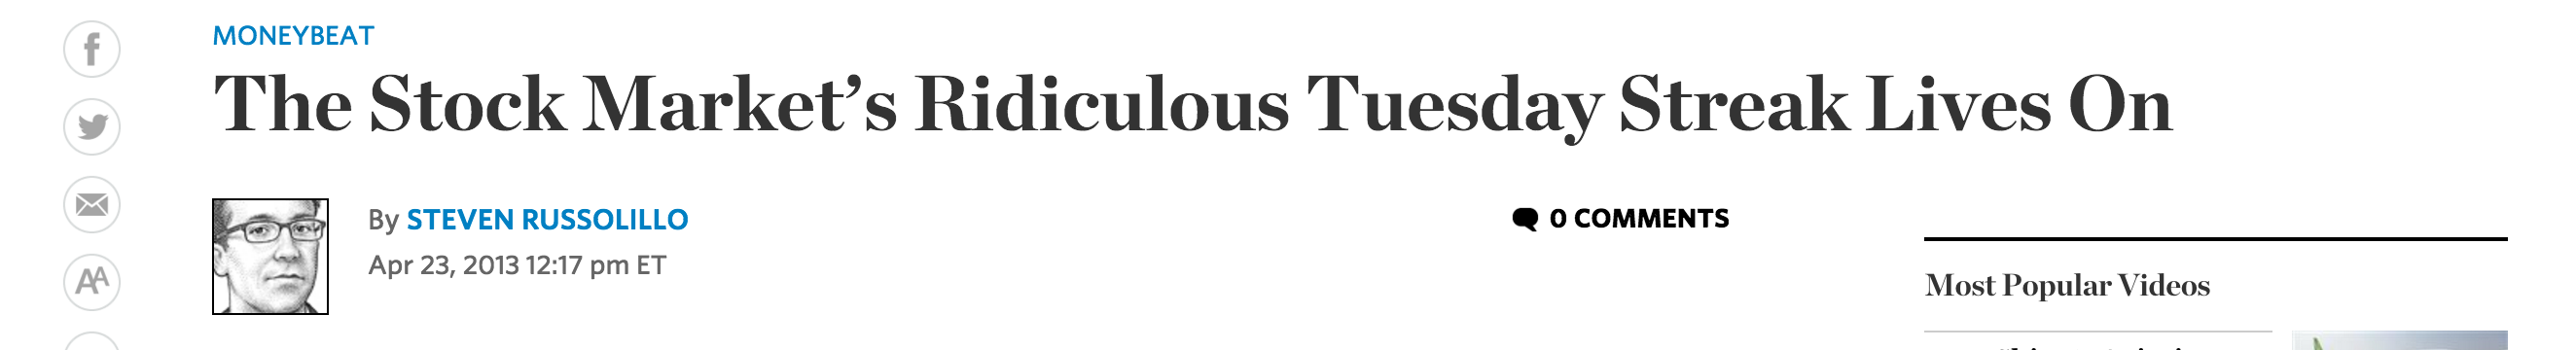

In [3]:
from IPython.display import Image
Image(filename='img/wsj_turnaround_tuesday.png') 

### What does the data say?.... Let's find out!

In [4]:
import pandas as pd

### Get some data!

`#git clone https://github.com/talumbau/strata_data.git`

In [5]:
sp500 = pd.read_csv("data/table.csv", index_col=0, parse_dates=True)

In [6]:
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,4607290000,1923.670044
2016-01-08,1985.319946,1985.319946,1918.459961,1922.030029,4664940000,1922.030029
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,1943.089966
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,1990.260010
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,2016.709961


In [7]:
sptt = sp500[["Adj Close"]]

In [8]:
sptt.head()

,Adj Close
Date,
2016-01-11,1923.670044
2016-01-08,1922.030029
2016-01-07,1943.089966
2016-01-06,1990.260010
2016-01-05,2016.709961


In [9]:
sptt.tail()

,Adj Close
Date,
1950-01-09,17.08
1950-01-06,16.98
1950-01-05,16.93
1950-01-04,16.85
1950-01-03,16.66


### If you have datetime data, it's almost always the right answer to use pandas


In [10]:
sp500.index

DatetimeIndex(['2016-01-11', '2016-01-08', '2016-01-07', '2016-01-06',
               '2016-01-05', '2016-01-04', '2015-12-31', '2015-12-30',
               '2015-12-29', '2015-12-28',
               ...
               '1950-01-16', '1950-01-13', '1950-01-12', '1950-01-11',
               '1950-01-10', '1950-01-09', '1950-01-06', '1950-01-05',
               '1950-01-04', '1950-01-03'],
              dtype='datetime64[ns]', name='Date', length=16613, freq=None)

### First question: which days did the market go up or down?

In [11]:
def rel_change(x):
    return (x[0] - x[1])/x[1]

In [12]:
sptt.assign?

In [13]:
sptt = sptt.assign(UpDown=pd.rolling_apply(sptt, 2, rel_change))

/Users/talumbau/miniconda3/envs/coursebuild/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).apply(args=<tuple>,kwargs=<dict>,func=<function>)
  if __name__ == '__main__':


In [14]:
sptt.ix[0:20]

,Adj Close,UpDown
Date,,
2016-01-11,1923.670044,NaN
2016-01-08,1922.030029,0.000853
2016-01-07,1943.089966,-0.010838
2016-01-06,1990.260010,-0.023700
2016-01-05,2016.709961,-0.013115
2016-01-04,2012.660034,0.002012
2015-12-31,2043.939941,-0.015304
2015-12-30,2063.360107,-0.009412
2015-12-29,2078.360107,-0.007217


Hmm... we need to shift the results "up" one. January 11 was an "up" day, but its entry is one row too low in the "UpDown" column

In [15]:
sptt.UpDown = sptt.UpDown.shift(-1)

In [16]:
sptt.ix[0:20]

,Adj Close,UpDown
Date,,
2016-01-11,1923.670044,0.000853
2016-01-08,1922.030029,-0.010838
2016-01-07,1943.089966,-0.023700
2016-01-06,1990.260010,-0.013115
2016-01-05,2016.709961,0.002012
2016-01-04,2012.660034,-0.015304
2015-12-31,2043.939941,-0.009412
2015-12-30,2063.360107,-0.007217
2015-12-29,2078.360107,0.010630


In [17]:
sptt.head()

,Adj Close,UpDown
Date,,
2016-01-11,1923.670044,0.000853
2016-01-08,1922.030029,-0.010838
2016-01-07,1943.089966,-0.023700
2016-01-06,1990.260010,-0.013115
2016-01-05,2016.709961,0.002012


In [18]:
sptt.head()

,Adj Close,UpDown
Date,,
2016-01-11,1923.670044,0.000853
2016-01-08,1922.030029,-0.010838
2016-01-07,1943.089966,-0.023700
2016-01-06,1990.260010,-0.013115
2016-01-05,2016.709961,0.002012


In [19]:
sptt.tail()

,Adj Close,UpDown
Date,,
1950-01-09,17.08,0.005889
1950-01-06,16.98,0.002953
1950-01-05,16.93,0.004748
1950-01-04,16.85,0.011405
1950-01-03,16.66,NaN


### Next question: which day of the week corresponds to each row?

In [20]:
sptt.index

DatetimeIndex(['2016-01-11', '2016-01-08', '2016-01-07', '2016-01-06',
               '2016-01-05', '2016-01-04', '2015-12-31', '2015-12-30',
               '2015-12-29', '2015-12-28',
               ...
               '1950-01-16', '1950-01-13', '1950-01-12', '1950-01-11',
               '1950-01-10', '1950-01-09', '1950-01-06', '1950-01-05',
               '1950-01-04', '1950-01-03'],
              dtype='datetime64[ns]', name='Date', length=16613, freq=None)

In [21]:
dir(sptt.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__inv__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__unicode__',
 '__weakref__',
 '__xor__',
 '_add_comparison_methods',
 '_add_datelike',
 '_add_datetimelike_methods',
 '_add_delta',
 '_add_delta_td',
 '_add_delta

In [22]:
sptt['day_num'] = sptt.index.dayofweek

In [23]:
sptt.head(7)

,Adj Close,UpDown,day_num
Date,,,
2016-01-11,1923.670044,0.000853,0
2016-01-08,1922.030029,-0.010838,4
2016-01-07,1943.089966,-0.023700,3
2016-01-06,1990.260010,-0.013115,2
2016-01-05,2016.709961,0.002012,1
2016-01-04,2012.660034,-0.015304,0
2015-12-31,2043.939941,-0.009412,3


### Groupby operations! Do calculations over every value that has the same day of week. Ex:

In [24]:
sptt["Adj Close"].groupby(sptt.index.dayofweek).mean()

0    478.334693
1    487.397694
2    487.905133
3    485.221006
4    484.926614
Name: Adj Close, dtype: float64

### Let's get more specific with the "Turning Tuesday Hypothesis":

We'll say a "down market" is a market where there are three or more days in a row where the market closes lower than it started. So, for example, for a Thursday, we are interested in what has happened on the three previous tradings days (typically the Monday, Tuesday, and Wednesday directly preceding the Thursday). With that as the definition of a "down market", the question is then, 'When we are in a down market, do we return to an up market more frequently on a Tuesday than on other days of the week?'

In [25]:
def last_three_days_down(x):
    if x[1]<=0 and x[2]<=0 and x[3]<=0:
        return 1
    else:
        return 0

In [26]:
sptt['ltdd'] = pd.rolling_apply(sptt["UpDown"], 4, last_three_days_down).shift(-3)

/Users/talumbau/miniconda3/envs/coursebuild/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).apply(args=<tuple>,kwargs=<dict>,func=<function>)
  if __name__ == '__main__':


In [27]:
sptt.head()

,Adj Close,UpDown,day_num,ltdd
Date,,,,
2016-01-11,1923.670044,0.000853,0,1.0
2016-01-08,1922.030029,-0.010838,4,0.0
2016-01-07,1943.089966,-0.023700,3,0.0
2016-01-06,1990.260010,-0.013115,2,0.0
2016-01-05,2016.709961,0.002012,1,1.0


In [28]:
len(sptt)

16613

In [29]:
import numpy as np

In [30]:
sptt.head()

,Adj Close,UpDown,day_num,ltdd
Date,,,,
2016-01-11,1923.670044,0.000853,0,1.0
2016-01-08,1922.030029,-0.010838,4,0.0
2016-01-07,1943.089966,-0.023700,3,0.0
2016-01-06,1990.260010,-0.013115,2,0.0
2016-01-05,2016.709961,0.002012,1,1.0


In [31]:
sptt['turned'] = (sptt['ltdd'] > 0.) & (sptt['UpDown'] > 0.)

In [32]:
sptt.head(50)

,Adj Close,UpDown,day_num,ltdd,turned
Date,,,,,
2016-01-11,1923.670044,0.000853,0,1.0,True
2016-01-08,1922.030029,-0.010838,4,0.0,False
2016-01-07,1943.089966,-0.023700,3,0.0,False
2016-01-06,1990.260010,-0.013115,2,0.0,False
2016-01-05,2016.709961,0.002012,1,1.0,True
2016-01-04,2012.660034,-0.015304,0,0.0,False
2015-12-31,2043.939941,-0.009412,3,0.0,False
2015-12-30,2063.360107,-0.007217,2,0.0,False
2015-12-29,2078.360107,0.010630,1,0.0,False


In [33]:
sp_turning_days_totals = sptt.turned.groupby(sptt.index.dayofweek).sum()

In [34]:
%matplotlib inline

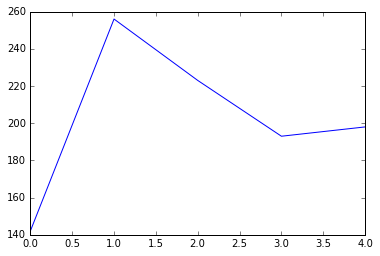

In [35]:
sp_turning_days_totals.plot()

In [36]:
sp_turning_days_totals

0    142.0
1    256.0
2    223.0
3    193.0
4    198.0
Name: turned, dtype: float64

### Ta-dah! Tuesdays really are a magic day! Off to start a hedge fund....
#### (please don't actually go and start a hedge fund)

## Try this:

 - What about 2 days down, then 1 up? Is the pattern the same? 4 days?
 - Is the day after a Turning Tuesday usually good? Or not?
 

# What Next?

This is a reasonable introduction to pandas, but it really does take practice. In the years since pandas was released the "DataFrame" idiom, originally taken from the R language (and maybe 'S' before that) has become even more ingrained in data tooling. In fact, it's been borrowed for frameworks meant to scale beyond a single machine, like Spark, or dask in the PyData world:

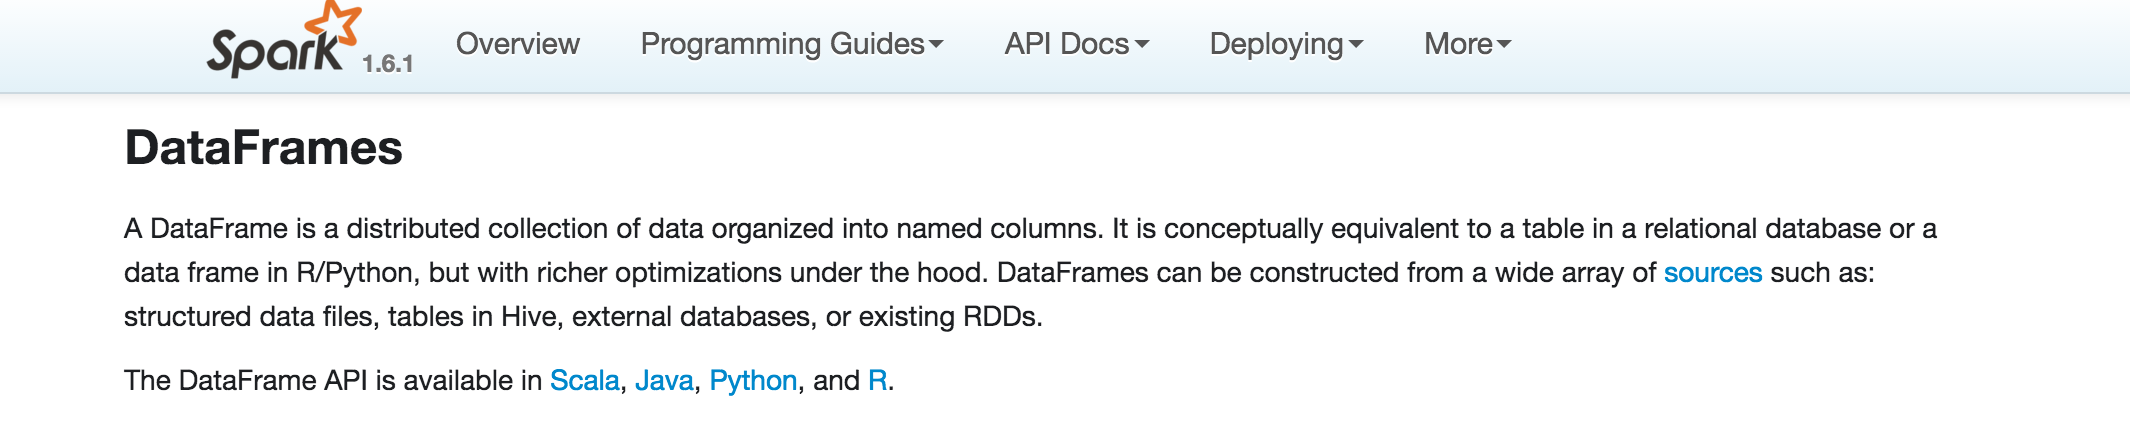

In [42]:

from IPython.display import Image
Image(filename='img/spark_dataframe.png') 

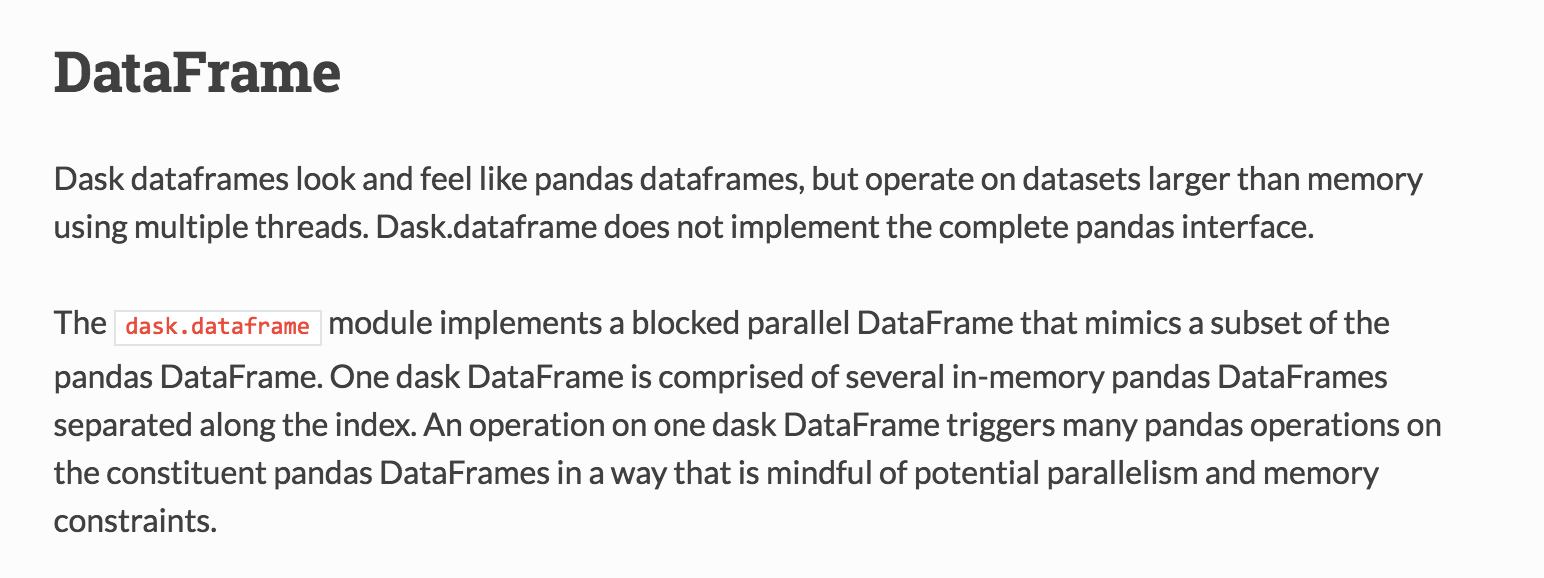

In [43]:
from IPython.display import Image
Image(filename='img/dask_dataframe.png') 

So, it's worth learning your way around pandas, since current and future library authors want to leverage that knowledge to incentivize users to try out their new data tool.

## Thanks for listening!!!

### Send me your thoughts via electrons:

### @talumbau
  
### tj.alumbaugh@continuum.io